In [1]:
# Import biblioteka
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [5]:
# 1. Učitavanje i analiza podataka

# Učitavanje CSV datoteke
df = pd.read_csv("HR_comma_sep.csv")  

# pregled podataka
print(df.head())
print(df.info())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2 

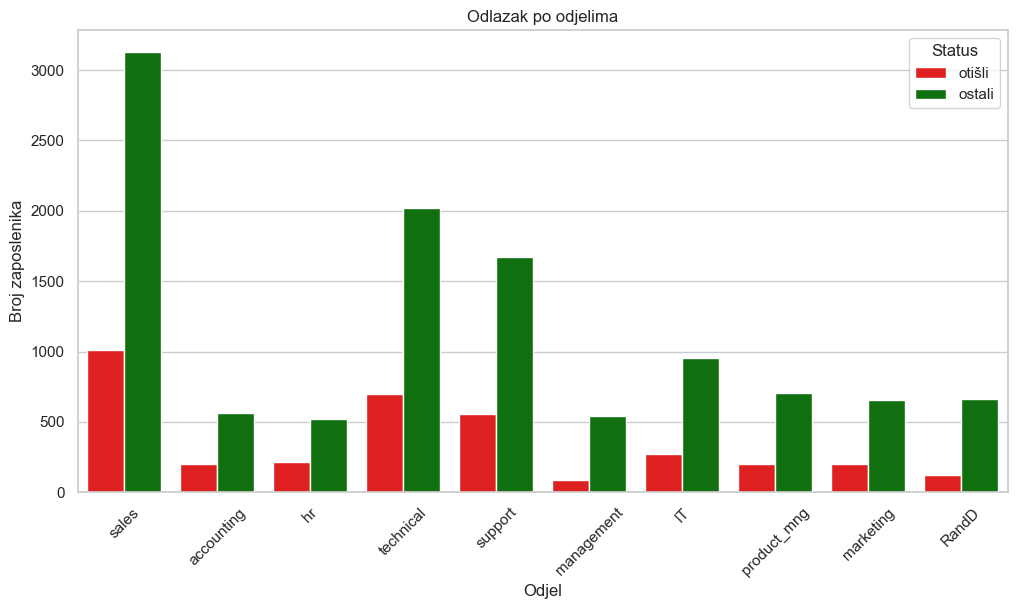

In [19]:
# Grafički prikaz zaposlenika koji su otišli i koji su ostali raditi
df['left_status'] = df['left'].map({0: 'ostali', 1: 'otišli'})
custom_palette = {'ostali': 'green', 'otišli': 'red'}
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Department', hue='left_status', palette=custom_palette)
plt.title("Odlazak po odjelima")
plt.xticks(rotation=45)
plt.xlabel("Odjel")
plt.ylabel("Broj zaposlenika")
plt.legend(title='Status')
plt.show()

In [9]:
# 3. Priprema podataka
# ---------------------------

# Kopija podataka i enkodiranje kategorija
data = df.copy()
label_enc = LabelEncoder()
data['Department'] = label_enc.fit_transform(data['Department'])
data['salary'] = label_enc.fit_transform(data['salary'])

# Odvajanje ulaznih i izlaznih varijabli
X = data.drop('left', axis=1)
y = data['left']

# Podjela na trening i test skup
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
# 4. Treniranje više modela

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"\n===== {name} =====")
    print(f"Preciznost: {acc:.4f}")
    print(classification_report(y_test, y_pred))



===== Logistic Regression =====
Preciznost: 0.7604
              precision    recall  f1-score   support

           0       0.79      0.92      0.85      3428
           1       0.49      0.24      0.32      1072

    accuracy                           0.76      4500
   macro avg       0.64      0.58      0.59      4500
weighted avg       0.72      0.76      0.73      4500


===== Random Forest =====
Preciznost: 0.9884
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3428
           1       0.99      0.96      0.98      1072

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500


===== Support Vector Machine =====
Preciznost: 0.7847
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      3428
           1       1.00      0.10      0.18      1072

    accuracy                 

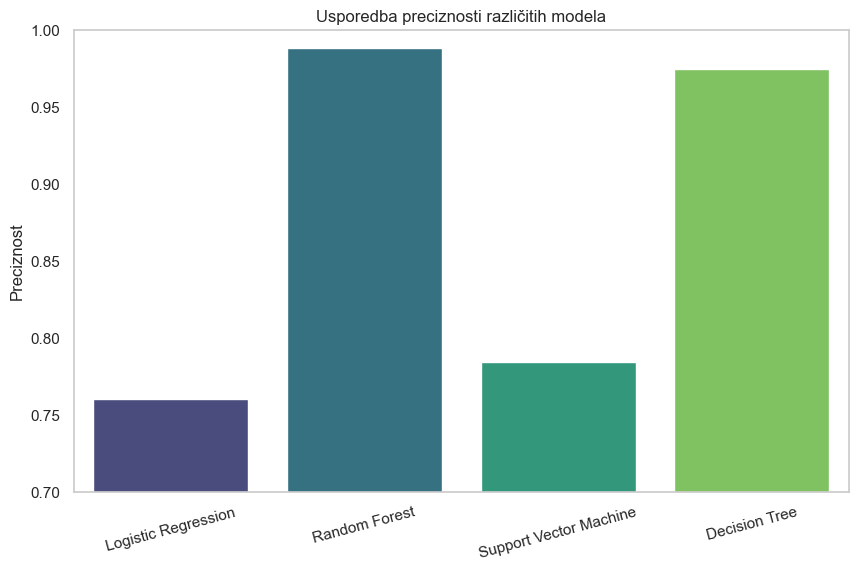

In [15]:
# 6. Usporedba preciznosti modela


plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()), hue=list(results.keys()), palette="viridis", legend=False)
plt.title("Usporedba preciznosti različitih modela")
plt.ylabel("Preciznost")
plt.ylim(0.7, 1.0)
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.show()

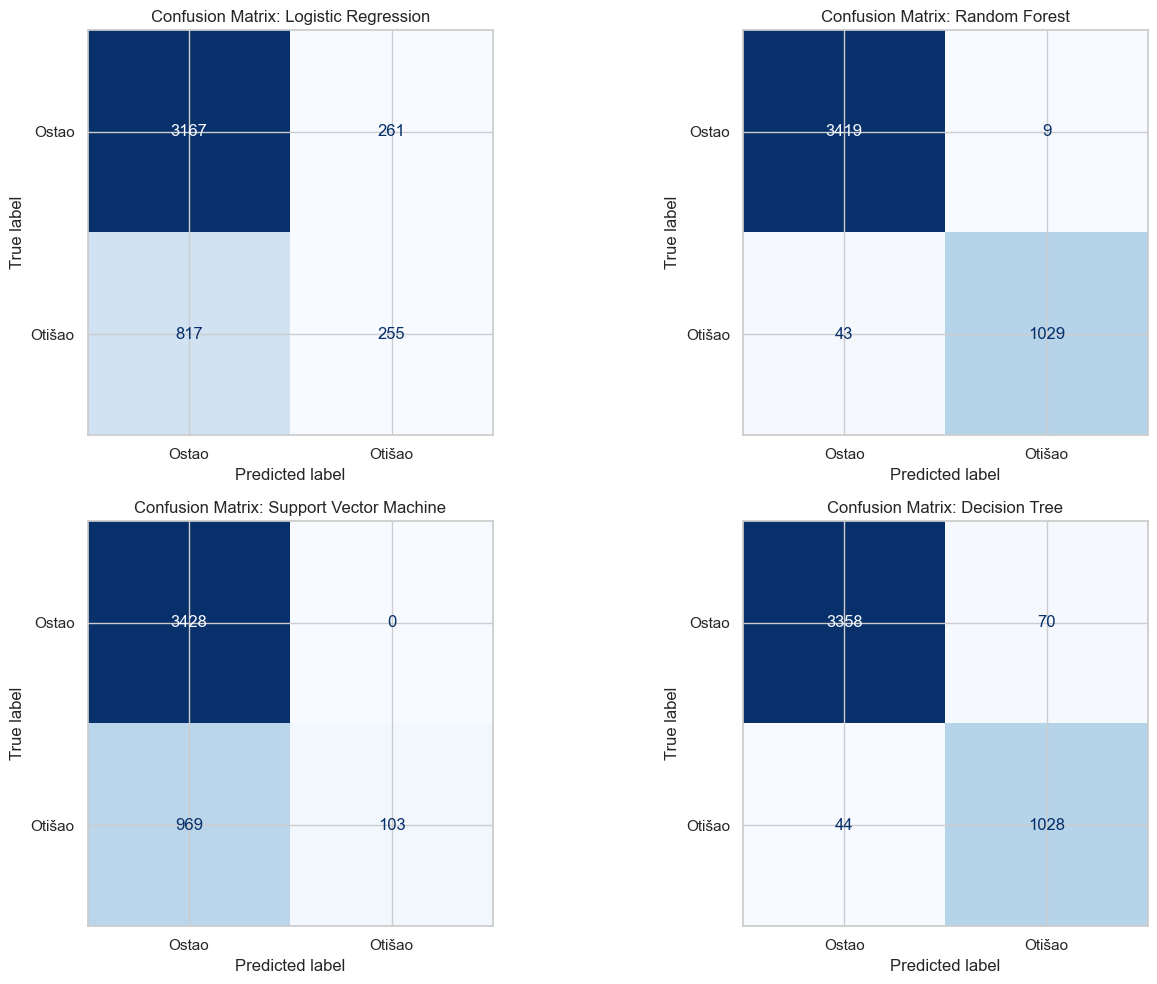

In [11]:
# 5. Konfuzione matrice


fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Ostao", "Otišao"])
    disp.plot(ax=axes[i], cmap='Blues', colorbar=False)
    axes[i].set_title(f"Confusion Matrix: {name}")

plt.tight_layout()
plt.show()